In [1]:
import pandas as pd
import numpy as np
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
import seaborn as sn
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns

In [2]:
data = pd.read_csv('Energy.csv')
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [3]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,3649.0,2.010038e+03,6.054228e+00,2000.000000,2005.000000,2.010000e+03,2.015000e+03,2.020000e+03
Access to electricity (% of population),3639.0,7.893370e+01,3.027554e+01,1.252269,59.800890,9.836157e+01,1.000000e+02,1.000000e+02
Access to clean fuels for cooking,3480.0,6.325529e+01,3.904366e+01,0.000000,23.175000,8.315000e+01,1.000000e+02,1.000000e+02
Renewable-electricity-generating-capacity-per-capita,2718.0,1.131375e+02,2.441673e+02,0.000000,3.540000,3.291000e+01,1.122100e+02,3.060190e+03
Financial flows to developing countries (US $),1560.0,9.422400e+07,2.981544e+08,0.000000,260000.000000,5.665000e+06,5.534750e+07,5.202310e+09
Renewable energy share in the total final energy consumption (%),3455.0,3.263816e+01,2.989490e+01,0.000000,6.515000,2.330000e+01,5.524500e+01,9.604000e+01
Electricity from fossil fuels (TWh),3628.0,7.036500e+01,3.480519e+02,0.000000,0.290000,2.970000e+00,2.683750e+01,5.184130e+03
Electricity from nuclear (TWh),3523.0,1.345019e+01,7.300662e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,8.094100e+02
Electricity from renewables (TWh),3628.0,2.396801e+01,1.044311e+02,0.000000,0.040000,1.470000e+00,9.600000e+00,2.184940e+03
Low-carbon electricity (% electricity),3607.0,3.680118e+01,3.431488e+01,0.000000,2.877847,2.786507e+01,6.440379e+01,1.000000e+02


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [5]:
missing_values = data.isna().sum()  

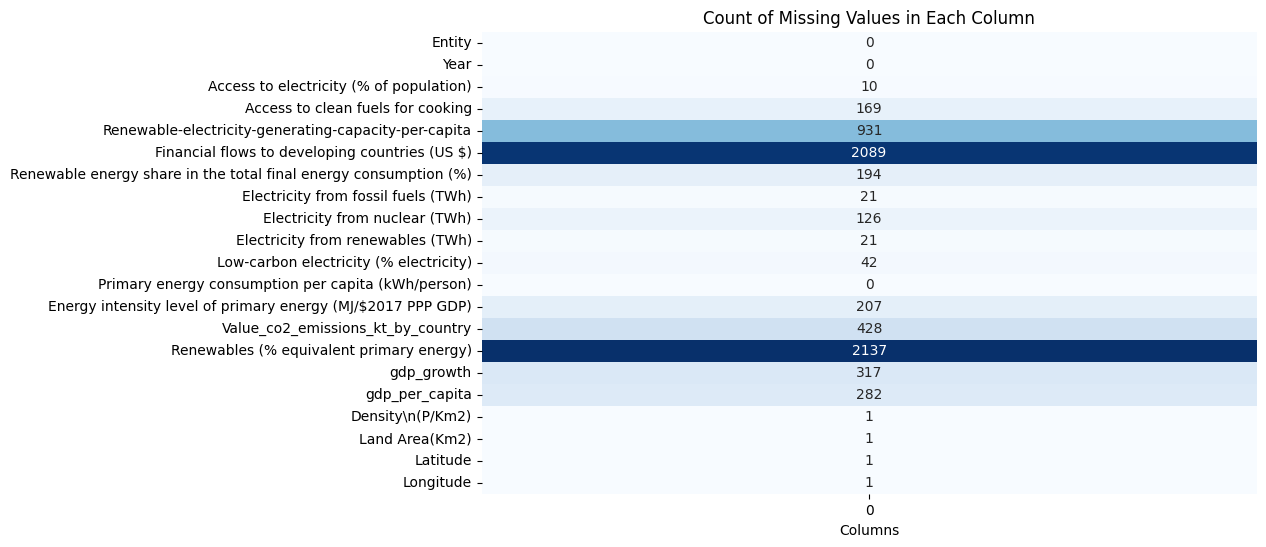

In [6]:
# Create a heatmap
fig_missing_values = plt.figure(figsize=(10, 6))
sns.heatmap(missing_values.to_frame(), cmap='Blues', annot=True, fmt='d', cbar=False)
# Customize the chart
plt.title('Count of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('')
# Display the chart
plt.show()

In [7]:
data.drop(columns=['Financial flows to developing countries (US $)', 'Renewables (% equivalent primary energy)',
                 'Renewable-electricity-generating-capacity-per-capita'], inplace=True)

In [8]:
# Fill missing values with mean
columns_to_fill_mean = ['Access to clean fuels for cooking', 'Renewable energy share in the total final energy consumption (%)',
                        'Electricity from nuclear (TWh)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
                        'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita']
data[columns_to_fill_mean] = data[columns_to_fill_mean].apply(lambda x: x.fillna(x.mean()))

In [9]:
# Drop remaining rows with missing values
data = data.dropna()

In [10]:
data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,3.441610,13283.774348,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,3.441610,13283.774348,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,3.441610,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [11]:
data_pl = data[data['Entity'] == "Poland"]
data_pl

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
2640,Poland,2000,100.0,100.0,6.930000,140.85,0.0,2.33,1.627322,26426.166,5.980000,295770.000000,4.561026,4501.454067,124,312685.0,51.919438,19.145136
2641,Poland,2001,100.0,100.0,7.290000,140.94,0.0,2.78,1.934317,26135.066,5.940000,293630.000000,1.258478,4991.244358,124,312685.0,51.919438,19.145136
2642,Poland,2002,100.0,100.0,7.490000,139.72,0.0,2.77,1.943996,25864.023,5.760000,287320.007300,2.035900,5207.171421,124,312685.0,51.919438,19.145136
2643,Poland,2003,100.0,100.0,7.290000,147.76,0.0,2.25,1.499900,26777.979,5.710000,297730.011000,3.498396,5701.602212,124,312685.0,51.919438,19.145136
2644,Poland,2004,100.0,100.0,7.310000,149.06,0.0,3.20,2.101668,26977.344,5.460000,301850.006100,4.982826,6681.386472,124,312685.0,51.919438,19.145136
2645,Poland,2005,100.0,100.0,7.220000,151.20,0.0,3.85,2.483070,27590.934,5.340000,301350.006100,3.506850,8021.505743,124,312685.0,51.919438,19.145136
2646,Poland,2006,100.0,100.0,7.180000,156.16,0.0,4.29,2.673730,28976.988,5.290000,314089.996300,6.131138,9035.410467,124,312685.0,51.919438,19.145136
2647,Poland,2007,100.0,100.0,7.280000,153.08,0.0,5.43,3.425652,28913.844,4.920000,313380.004900,7.061543,11254.517390,124,312685.0,51.919438,19.145136
2648,Poland,2008,100.0,100.0,8.010000,148.03,0.0,6.61,4.274444,29419.190,4.780000,308329.986600,4.199969,13996.025150,124,312685.0,51.919438,19.145136
2649,Poland,2009,100.0,100.0,8.840000,142.40,0.0,8.69,5.751539,28364.893,4.470000,297260.009800,2.832178,11526.055890,124,312685.0,51.919438,19.145136


In [12]:
min_lat = 36  # Minimal latitude of Europe
max_lat = 70  # Max latitude of Europe
min_lon = -10  # Min longitude of Europe
max_lon = 40  # Max longitude of Europe


europe_df = data[(data['Latitude'] >= min_lat) & (data['Latitude'] <= max_lat) &
               (data['Longitude'] >= min_lon) & (data['Longitude'] <= max_lon)]

europe_df

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
21,Albania,2000,100.0,38.2,32.638165,0.14,0.00,4.55,97.014930,9029.4375,4.130000,3170.000000,6.946217,1126.683340,105,28748.0,41.153332,20.168331
22,Albania,2001,100.0,40.5,32.638165,0.13,0.00,3.52,96.438354,8635.5320,3.890000,3230.000000,8.293313,1281.659826,105,28748.0,41.153332,20.168331
23,Albania,2002,100.0,43.2,32.638165,0.16,0.00,3.48,95.604390,9443.5550,4.100000,3759.999990,4.536524,1425.124219,105,28748.0,41.153332,20.168331
24,Albania,2003,100.0,46.4,32.638165,0.10,0.00,5.12,98.084300,10756.6120,3.800000,4070.000172,5.528637,1846.120121,105,28748.0,41.153332,20.168331
25,Albania,2004,100.0,49.0,32.638165,0.13,0.00,5.41,97.653430,11586.9510,3.960000,4250.000000,5.514668,2373.581292,105,28748.0,41.153332,20.168331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3497,United Kingdom,2016,100.0,100.0,8.600000,181.56,71.73,82.99,46.009277,34296.6840,2.530000,380809.997600,2.263464,41499.555700,281,243610.0,55.378051,-3.435973
3498,United Kingdom,2017,100.0,100.0,9.700000,165.91,70.34,98.85,50.489407,34098.8120,2.450000,367000.000000,2.134453,40857.755580,281,243610.0,55.378051,-3.435973
3499,United Kingdom,2018,100.0,100.0,10.990000,155.41,65.06,110.03,52.977306,33771.4960,2.410000,360730.011000,1.650925,43646.951970,281,243610.0,55.378051,-3.435973
3500,United Kingdom,2019,100.0,100.0,12.240000,144.99,56.18,120.48,54.923054,32893.7600,2.300000,348920.013400,1.671944,43070.498360,281,243610.0,55.378051,-3.435973


In [30]:
europe_df['Entity'].unique()

array(['Albania', 'Austria', 'Belarus', 'Belgium',
       'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg',
       'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Spain',
       'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom'],
      dtype=object)

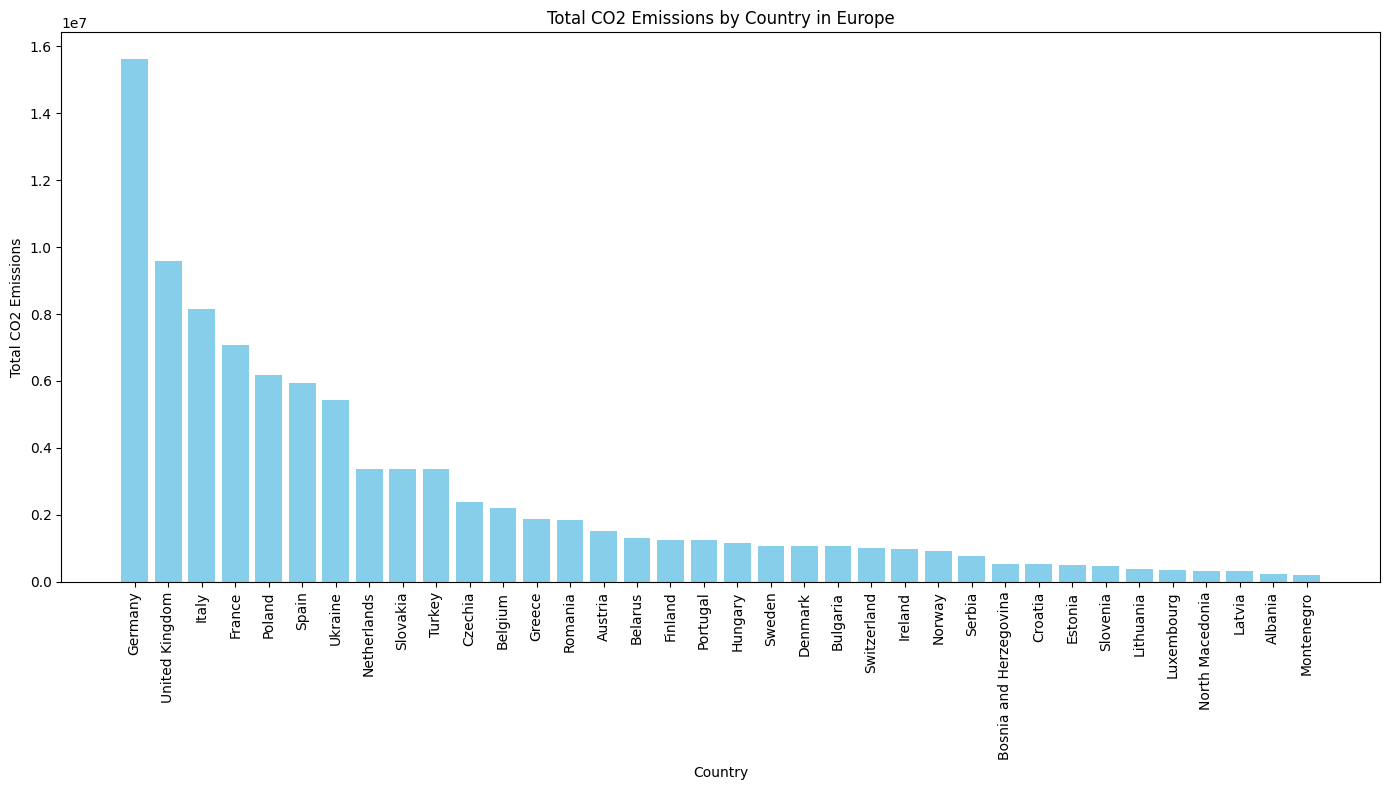

In [13]:
co2_agg = europe_df.groupby('Entity')['Value_co2_emissions_kt_by_country'].sum().reset_index()

co2_agg_sorted = co2_agg.sort_values(by='Value_co2_emissions_kt_by_country', ascending=False)

plt.figure(figsize=(14, 8))
plt.bar(co2_agg_sorted['Entity'], co2_agg_sorted['Value_co2_emissions_kt_by_country'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions')
plt.title('Total CO2 Emissions by Country in Europe')
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.show()

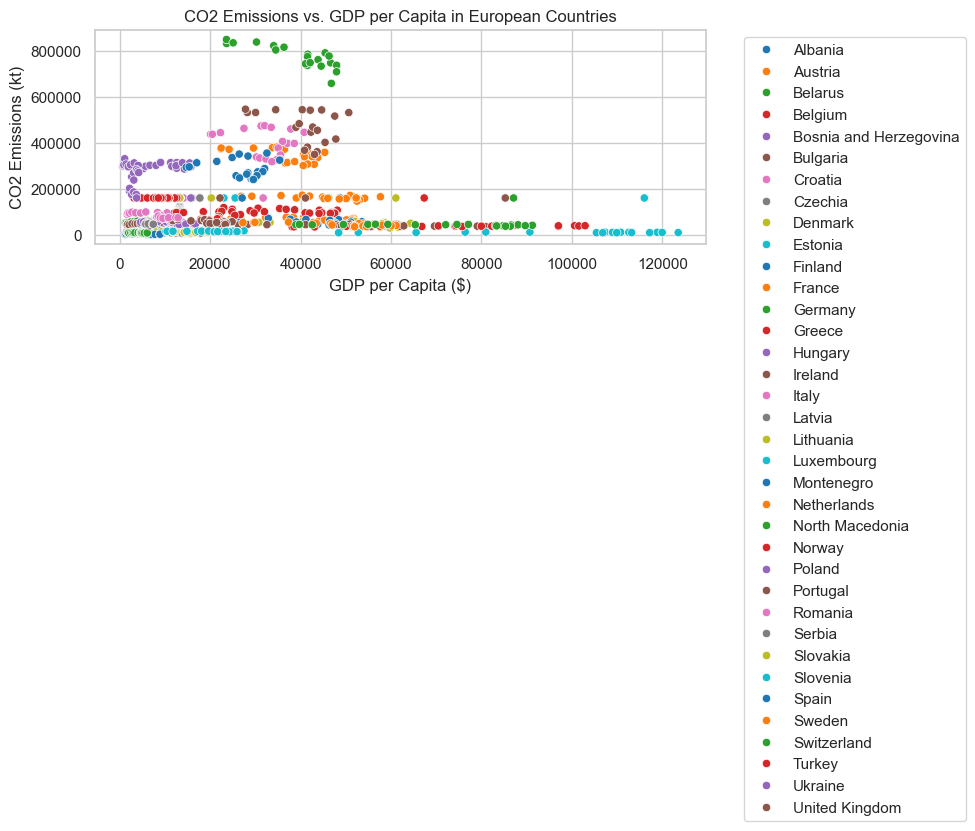

In [14]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp_per_capita', y='Value_co2_emissions_kt_by_country', hue='Entity', data=europe_df, palette='tab10')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('CO2 Emissions (kt)')
plt.title('CO2 Emissions vs. GDP per Capita in European Countries')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

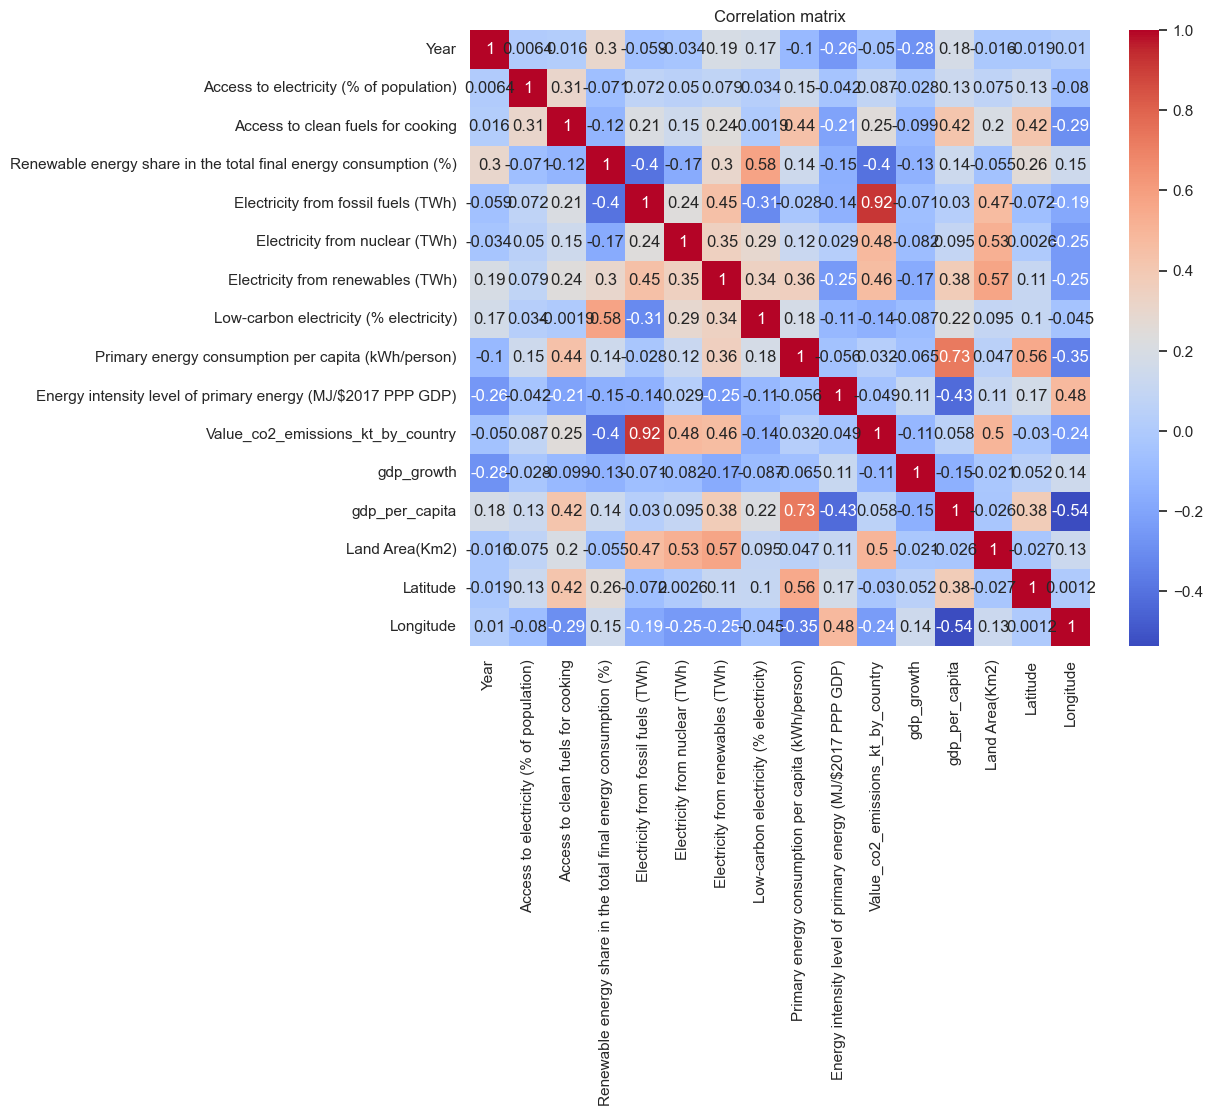

In [15]:
numeric_data = europe_df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [16]:
correlation = numeric_data.corr()['Value_co2_emissions_kt_by_country']

print(correlation)

Year                                                               -0.050353
Access to electricity (% of population)                             0.086656
Access to clean fuels for cooking                                   0.247163
Renewable energy share in the total final energy consumption (%)   -0.398391
Electricity from fossil fuels (TWh)                                 0.920776
Electricity from nuclear (TWh)                                      0.480938
Electricity from renewables (TWh)                                   0.463880
Low-carbon electricity (% electricity)                             -0.142356
Primary energy consumption per capita (kWh/person)                  0.031512
Energy intensity level of primary energy (MJ/$2017 PPP GDP)        -0.048748
Value_co2_emissions_kt_by_country                                   1.000000
gdp_growth                                                         -0.113053
gdp_per_capita                                                      0.058041

In [17]:
X = europe_df[['Electricity from fossil fuels (TWh)', 'Renewable energy share in the total final energy consumption (%)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Land Area(Km2)']]
y = europe_df['Value_co2_emissions_kt_by_country']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=80085)

In [18]:
X_train.head()


,Electricity from fossil fuels (TWh),Renewable energy share in the total final energy consumption (%),Electricity from nuclear (TWh),Electricity from renewables (TWh),Land Area(Km2)
452,10.24,14.16,0.00,4.34,51197.0
197,19.97,29.68,0.00,44.53,83871.0
1100,10.38,20.29,0.00,0.20,45228.0
900,47.51,14.72,29.92,9.43,78871.0
1831,1.63,34.34,0.00,2.34,64589.0


## First model - Linear Regression

In [19]:
model_LR = LinearRegression()

model_LR.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model_LR.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)
n = len(X_test)
p = X_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Adjusted R-squared: {adj_r2:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Error (MAE): 31267.28
Root Mean Squared Error (RMSE): 47404.89
Adjusted R-squared: 0.91
Mean Absolute Percentage Error (MAPE): 84.95%


- Mean Absolute Error (MAE): The MAE value of approximately 31,267.28 indicates that, on average, the model's predictions are off by around 31,267.28 kilotons of CO2 emissions.

- Root Mean Squared Error (RMSE): The RMSE value of approximately 47,404.89 indicates that, on average, the model's predictions are off by around 47,404.89 kilotons of CO2 emissions.

- Adjusted R-squared: The adjusted R-squared value of 0.91 suggests that approximately 91% of the variance in CO2 emissions is explained by the independent variables in the model.

- Mean Absolute Percentage Error (MAPE): The MAPE value of approximately 84.95% indicates that, on average, the model's predictions have an absolute percentage error of around 84.95%. This means that this model is inaccurate. 

In [21]:
from scipy.stats import zscore

z_scores = zscore(X)

threshold = 3

outlier_indices = np.where(np.abs(z_scores) > threshold)[0]

X_clean = X.drop(X.index[outlier_indices])
y_clean = y.drop(y.index[outlier_indices])

In [22]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=80085)

In [23]:
model_LR.fit(X_train_clean, y_train_clean)

LinearRegression()

In [24]:
y_pred_clean = model_LR.predict(X_test_clean)

mae_clean = mean_absolute_error(y_test_clean, y_pred_clean)

rmse_clean = np.sqrt(mean_squared_error(y_test_clean, y_pred_clean))

r2_clean = r2_score(y_test_clean, y_pred_clean)
n = len(X_test_clean)
p = X_test_clean.shape[1]
adj_r2_clean = 1 - ((1 - r2_clean) * (n - 1) / (n - p - 1))

mape_clean = np.mean(np.abs((y_test_clean - y_pred_clean) / y_test_clean)) * 100

print(f'Mean Absolute Error (MAE): {mae_clean:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_clean:.2f}')
print(f'Adjusted R-squared: {adj_r2_clean:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_clean:.2f}%')

Mean Absolute Error (MAE): 29772.30
Root Mean Squared Error (RMSE): 44710.16
Adjusted R-squared: 0.79
Mean Absolute Percentage Error (MAPE): 84.37%


Unfortunately, after cleaning the data from outliers, the model only improved by 0.58%. The model lost some adjusted R^2 value. Removing outliers may have resulted in the loss of some information that was useful for explaining the variance in CO2 emissions. Outliers sometimes contain valuable insights or signal in the data. Because the model is still inacurate I will not check the assumptions of the Linear Regression.

## Second model - Decision Tree

Decision Tree models might be preferred in cases where the relationship between the features and the target variable is nonlinear or highly complex, as they can capture nonlinear relationships and interactions between variables more effectively than linear models.

In [25]:
tree_model = DecisionTreeRegressor()

tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [26]:
y_pred_tree = tree_model.predict(X_test)

In [27]:
mae = mean_absolute_error(y_test, y_pred_tree)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))

n = len(X_test)
p = X_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

mape = np.mean(np.abs((y_test - y_pred_tree) / y_test)) * 100

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Adjusted R-squared: {adj_r2:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Error (MAE): 7834.26
Root Mean Squared Error (RMSE): 22681.64
Adjusted R-squared: 0.91
Mean Absolute Percentage Error (MAPE): 12.09%


A graph of the decision tree used by this model:

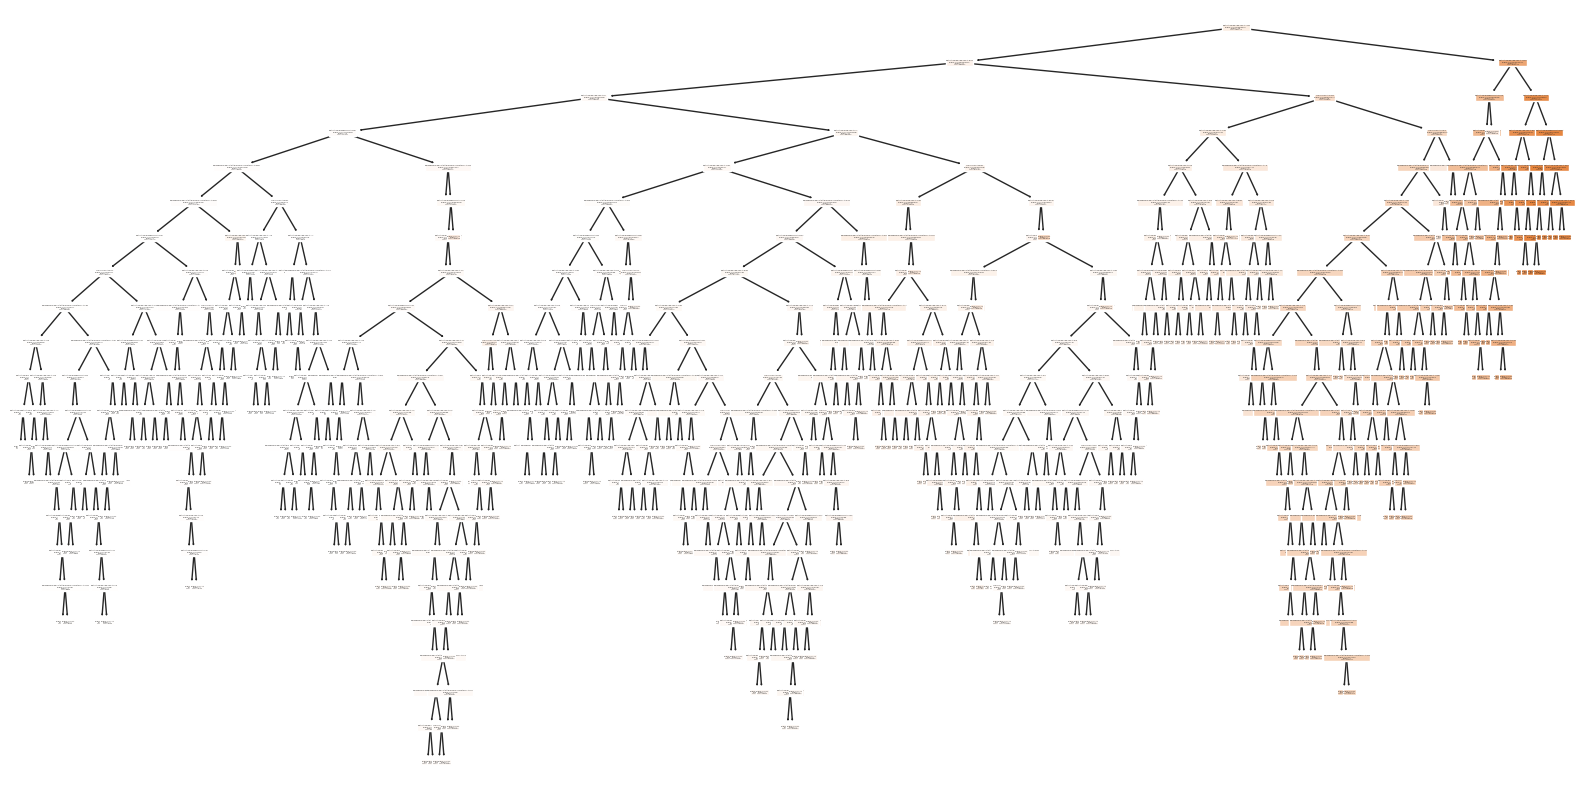

In [28]:
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=y.unique())
plt.show()

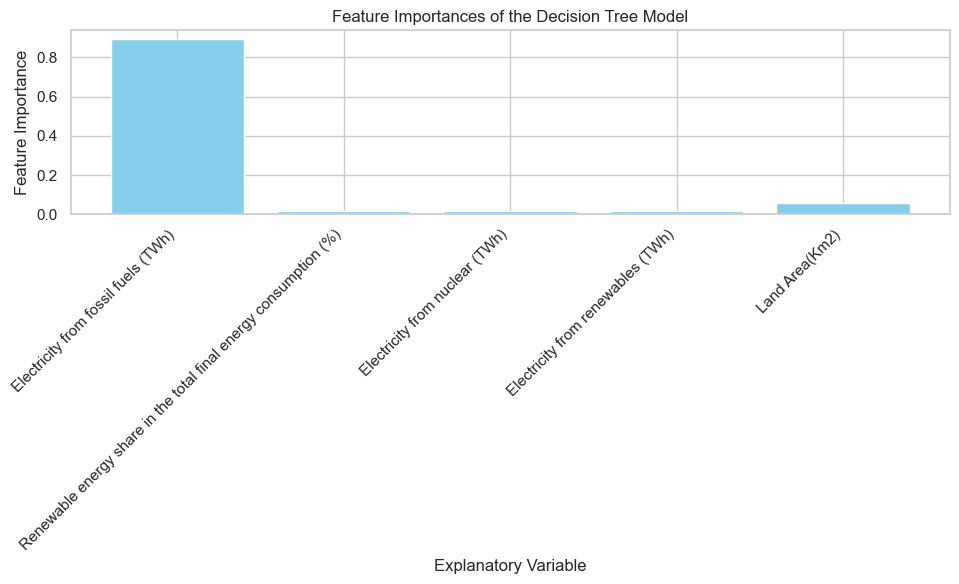

In [29]:
feature_importances = tree_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.bar(features, feature_importances, color='skyblue')
plt.xlabel('Explanatory Variable')
plt.ylabel('Feature Importance')
plt.title('Feature Importances of the Decision Tree Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()